In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
import zipfile
import os
import cv2
import random
warnings.filterwarnings('ignore')

In [ ]:
pip install ultralytics

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install roboflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key="WnV86Fx9jXKRIIgCkpv2")
project = rf.workspace("project-qlmwa").project("number-fuieb")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to number-1 in yolov11:: 100%|██████████| 7590/7590 [00:06<00:00, 1134.14it/s]


In [ ]:
names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'l', 'undefined', 'x']

def display_images_vertically(images_path, annotations_path, names, num_images=10):

    all_images = [img for img in os.listdir(images_path) if img.endswith('.jpg')]


    sample_images = random.sample(all_images, min(num_images, len(all_images)))


    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]

    # إعداد شكل الشبكة بحيث يكون عدد الأعمدة 1
    fig, axs = plt.subplots(len(sample_images), 1, figsize=(6, len(sample_images) * 4))


    axs = axs if isinstance(axs, np.ndarray) else [axs]


    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(images_path, img_name)
        annotation_path = os.path.join(annotations_path, img_name.replace('.jpg', '.txt'))


        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


        with open(annotation_path, 'r') as f:
            for line in f.readlines():
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                class_id = int(class_id)


                img_h, img_w = image.shape[:2]
                x_center, y_center = int(x_center * img_w), int(y_center * img_h)
                width, height = int(width * img_w), int(height * img_h)
                x1, y1 = int(x_center - width / 2), int(y_center - height / 2)
                x2, y2 = int(x_center + width / 2), int(y_center + height / 2)


                color = colors[class_id % len(colors)]
                cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
                cv2.putText(image, names[class_id], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


        axs[i].imshow(image)
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()




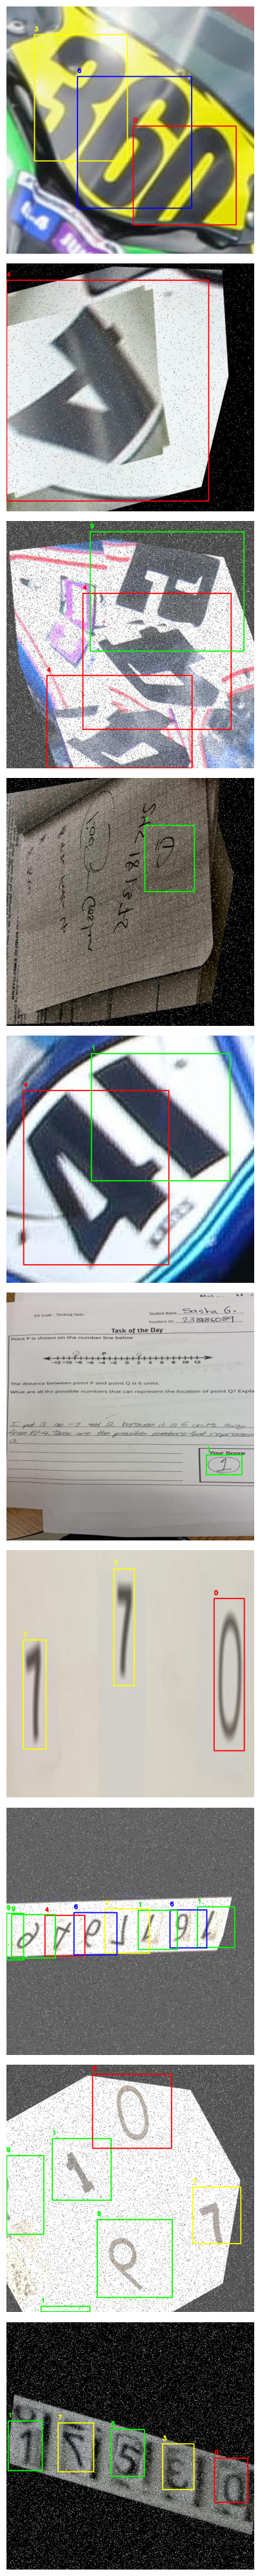

In [ ]:
display_images_vertically('/content/number-1/train/images', '/content/number-1/train/labels', names=names, num_images=10)

In [ ]:
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.25  Python-3.11.7 torch-2.5.1+cpu CPU (Intel Core(TM) i7-2630QM 2.00GHz)
Setup complete  (8 CPUs, 5.9 GB RAM, 179.1/292.9 GB disk)


In [ ]:
!yolo task=detect mode=train data=/content/number-1/data.yaml model=yolo11s.pt epochs=10 imgsz=640 batch=16 project='/content/drive/MyDrive/Yolo_Training' name='my_yolo_model'


100% 18.4M/18.4M [00:00<00:00, 448MB/s]
Ultralytics 8.3.24 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/number-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Yolo_Training, name=my_yolo_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Yolo_Training/my_yolo_model/weights/best.pt imgsz=640 conf=0.5 \
source=/content/number-1/test/images project='/content/drive/MyDrive/Yolo_Training/Results' name='predictions'


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.25 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,417,831 parameters, 0 gradients, 21.3 GFLOPs

image 1/135 /content/number-1/test/images/0_jpg.rf.1064a913f3134394aa140633aed4a93e.jpg: 640x640 1 3, 1 7, 1 9, 656.3ms
image 2/135 /content/number-1/test/images/102_jpg.rf.9b0638b0ab2db73685cbf4ccd8073d5b.jpg: 640x640 1 0, 1 2, 2 4s, 1 5, 2 6s, 2 8s, 590.5ms
image 3/135 /content/number-1/test/images/103-A86Q7394_jpg.rf.25890f0b95157d29ff0b0205d018abe7.jpg: 640x640 1 1, 1 4, 1 9, 592.3ms
image 4/135 /content/number-1/test/images/105_jpg.rf.f94cf3e013b3d41006b60864b72f73d4.jpg: 640x640 1 0, 1 4, 1 6, 1 7, 1 8, 580.9ms
im

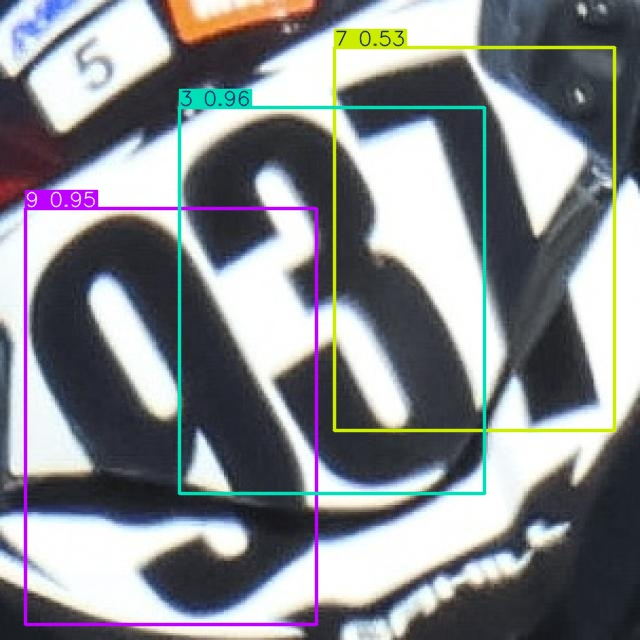

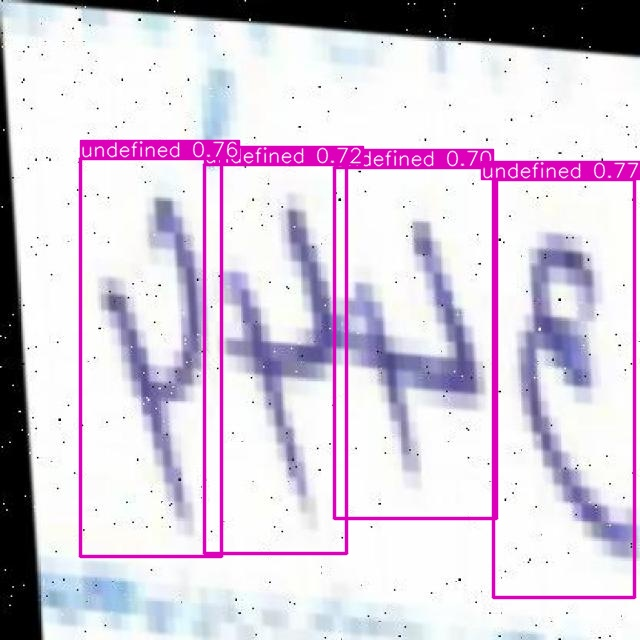

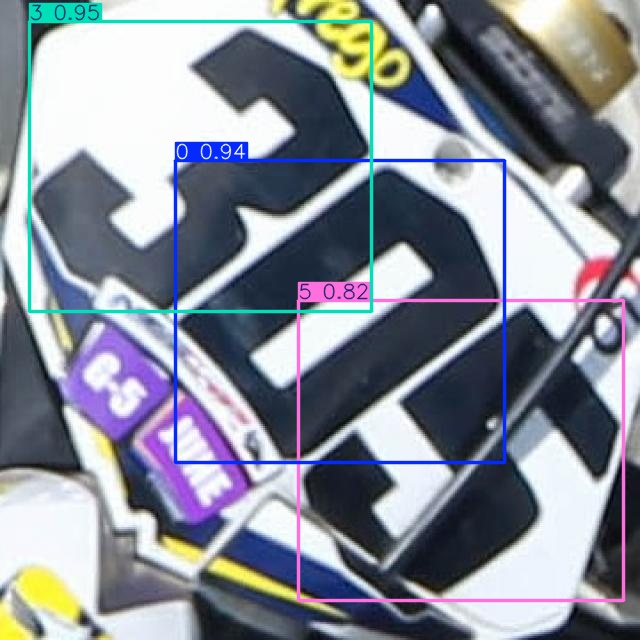

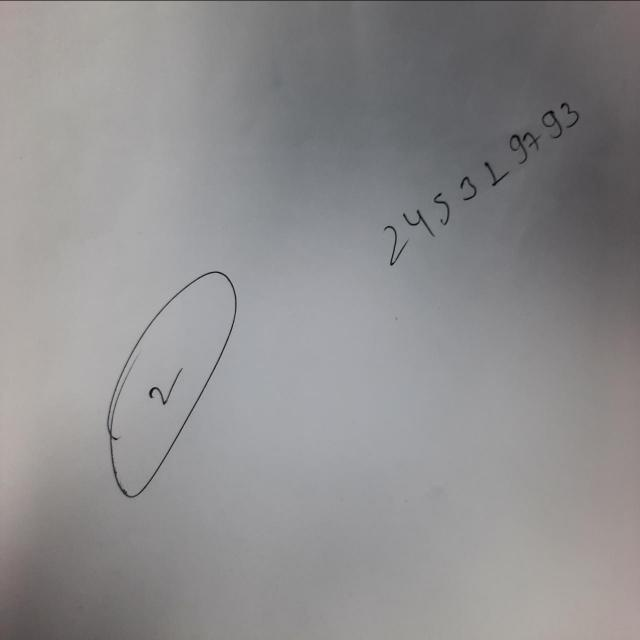

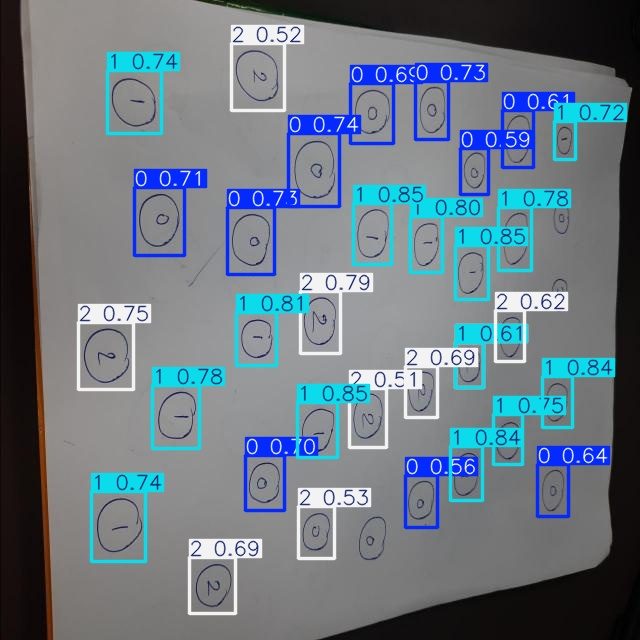

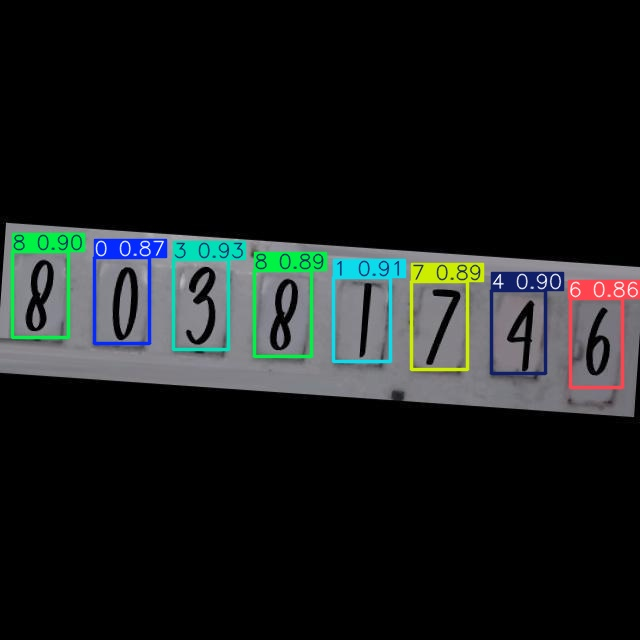

In [ ]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("/content/drive/MyDrive/Yolo_Training/Results/predictions/*.jpg"): #assuming JPG
    if i %25 ==0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1



# **real time**

In [ ]:

model = YOLO('best.pt')



In [ ]:
model.names

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'l',
 11: 'undefined',
 12: 'x'}

In [ ]:
cap = cv2.VideoCapture(1)
while True:
    ret, frame = cap.read()
    if not ret:
        break


    results = model.predict(frame)


    for r in results:
        for box in r.boxes:

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = box.conf[0]


            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 2)


            label = f"{model.names[cls]}: {conf:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)


    cv2.imshow("YOLO Real-Time Detection", frame)


    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 1446.0ms
Speed: 8.0ms preprocess, 1446.0ms inference, 8.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 2179.8ms
Speed: 97.0ms preprocess, 2179.8ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 843.7ms
Speed: 4.4ms preprocess, 843.7ms inference, 8.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 783.0ms
Speed: 22.3ms preprocess, 783.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 777.9ms
Speed: 20.9ms preprocess, 777.9ms inference, 8.1ms postprocess per image at shape (1, 3, 480, 640)


In [ ]:
frame = cv2.imread('1_235_70_51235602_42_jpg.rf.53dccaf68cb945c051cc2f404f9be1ba.jpg')

if frame is None:
    print("تعذر تحميل الصورة.")
else:
    results = model.predict(frame)

    for r in results:
        for box in r.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cls = int(box.cls[0])
            conf = box.conf[0]

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 0), 2)
            label = f"{model.names[cls]}: {conf:.2f}"
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (250, 250, 250), 2)

    cv2.imshow("YOLO Detection", frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


0: 640x640 1 0, 3 3s, 1 4, 3 5s, 1 6, 1 9, 1111.2ms
Speed: 17.7ms preprocess, 1111.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)
